# Лабораторная работа №2: "Классические методы математической статистики"
Выполнил студент гр. 1384 Белокобыльский Илья. Вариант №2

## Цель работы
Научится применять методы математической статистики для визуализации и анализа полученных данных; сформировать навыки реализации методов с помощью прикладных программных пакетов.

## Основные теоретические положения

Выборочные числовые характеристики:
- Математическое ожидание: $\bar{X}=\frac{1}{n} \sum_{i=1}^n x_i$
- К-ый момент: $\bar{x^k}=\frac{1}{n} \sum_{i=1}^n x_i^k$
- Дисперсия: $s^2=\frac{1}{n} \frac{n}{2}\left(x_i-\bar{x}\right)^2=\bar{x^2}-(\bar{x})^2$
- Коэффцициент асимметри: $\hat{S_{kew}}X=\frac{\left(\frac{1}{n} \sum_{i=1}^n\left(x_i-\bar{x}\right)^3\right)}{s^3}$
- Коэффициент эксцесса: $Kurt_X=\frac{1}{n} \frac{\sum_{i=1}^n\left(x_i-\bar{x}^4\right)}{s^4}-3$
  
Вариационный ряд – упорядоченный по возрастанию ряд данных.

Эмпирическая функция распределения - это функция, которая определяет для каждого значения x частоту событий X<x и предназначена для оценки теоретической функции распределения генеральной совокупности.

Гистограмма частот – это фигура, состоящая из прямоугольников, ширина которых равна длинам частичных интервалов, а высота – соответствующим плотностям частот.

Оценка Максимального Правдоподобия (ОМП):

Если $X_{1},...,X_{n}$-выборка из распределения с плотностью распределения $P_{\theta}, \theta\in \Theta$, то

1. Функция правдоподобия распадается в произведения $L(X, \theta)=\prod_{i=1}^{n}P_{\theta}(x_i)$
2. Логарифм функции правдоподобия представляется в виде суммы $LL(X, \theta)=\ln L(X, \theta)=\sum_{i=1}^{n}\ln P_{\theta}(x_i)$
3. В силу монотонности логарифма задача максимизации функции правдоподобия сводится к задаче максимизации ее логарифма по всем $\theta\in \Theta$
4. Если $\theta$ - d-мерный параметр и $P_{\theta}$ дифференцируема по $\theta$, то для нахождения максимума надо найти решения системы уравнений: U$(X, \theta)=\frac{\partial }{\partial \theta}LL(X, \theta)=0, i=1:d$

Оценка метода моментов (ОММ)

Пусть $X_{1}, ..., X_{n}$ - выборка из распределения $P_{\theta}, \theta=(\theta_{1},...,\theta_{d})$

$\exists \mu_{k}(\theta)=\mathbb{E}X^{k}_{1}, k=1:d$

Если $\exists!$ решение $\hat{\theta}(X)$ системы уравнений: $\hat{\mu^{k}}(\hat{\theta})=\mu_{k}(\theta), k=1:d$, где $\hat{\theta}(X)=\frac{1}{n}\sum_{i=1}^{n}X^{k}_{i}$-выборочный момент k-го порядка, то $\hat{\theta}(X)$ называется оценкой по методу моментов

Асимптотический доверительный интервал:

$$
\left[ \hat{\theta}(X)-\frac{X_{\alpha}}{\sqrt{n\cdot I\left( \hat{\theta}(X) \right)}};\hat{\theta}(X)+\frac{X_{\alpha}}{\sqrt{n\cdot I\left( \hat{\theta}(X) \right)}} \right]
$$

Статистика Хи-квадрат:  $\chi^{2} = \sum \limits_{i=1}^{N} \frac{(n_{i} - p_{i} n)^{2}}{n p_{i}} $

Статистика критерия Колмагорова: $D_n = sup_{x \in \mathbb{R}}|F_n(x) - F_0(x)|$

Теорема Колмагорова: $\sqrt{n}D_n \rightarrow K$

## Постановка задачи
Для полученных в результате эксперимента наборов данных выполнить статистическую обработку. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

### Задание 1

Ниже приведены исходные данные

In [153]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

X = np.array(
    [0, 1, 2, 0, 1, 2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 2, 1, 3, 0, 1, 2, 0, 1, 1, 1, 0, 1, 2, 1, 1, 3, 0,
     0, 1, 1, 1, 1, 0, 2, 1, 0, 0, 3, 2])
alpha1 = 0.1
a = 0.0
b = 1.8
lambda0 = 1.0
lambda1 = 4.0

#### a) Построить вариационный ряд, эмпирическую функцию распределения и гистограмму частот

In [154]:
X_var = np.sort(X)
print('Вариационный ряд:', X_var)

Вариационный ряд: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 2 2 2 2 2 2 2 2 3 3 3]


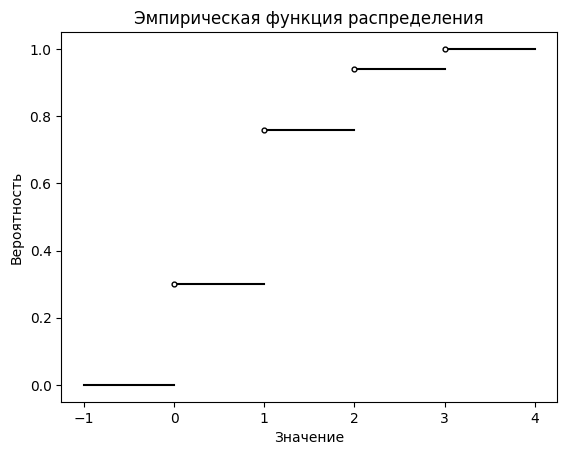

In [155]:
import math


def empirical(var):
    res = []
    for x in range(math.floor(var.min()), math.ceil(var.max()) + 2):
        count = 0
        for xi in var:
            if x > xi:
                count += 1
        res.append(count)
    return np.array(res) / len(var)


def draw_empirical(var, Y):
    r = range(math.floor(var[0]), math.ceil(var[-1]) + 2)
    plt.plot([r[0] - 1, r[0]], [0, 0], c='black', zorder=-1)
    for i in range(1, len(Y)):
        plt.plot([r[i - 1], r[i]], [Y[i], Y[i]], c='black', zorder=-1)
        plt.scatter(r[i - 1], Y[i], s=12, c='white', edgecolors='black', linewidths=1)
    plt.xlabel('Значение')
    plt.ylabel('Вероятность')
    plt.title('Эмпирическая функция распределения')
    plt.show()


draw_empirical(X_var, empirical(X))

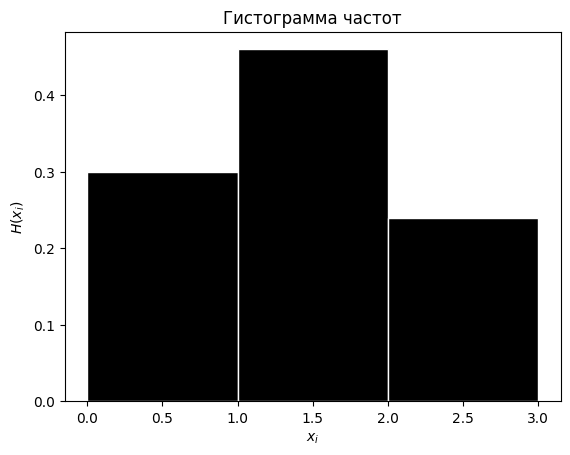

In [156]:
plt.hist(X_var, bins=range(X_var[0], X_var[-1] + 1), density=True, edgecolor='white', color='black')
plt.xlabel('$x_i$')
plt.ylabel('$H(x_i)$')
plt.title('Гистограмма частот')
plt.show()

#### b) Вычислить выборочные аналоги следующих числовых характеристик: (i) математического ожидания; (ii) дисперсии; (iii) СКО; (iv) медианы; (v) ассиметрии; (vi) эксцесса; (vii) вероятности $\mathbb{P}(X \in [a, b]) $

In [157]:
from scipy import stats


def get_stats(data):
    return {
        'mean': np.mean(data),
        'var': np.var(data),
        'stddev': np.std(data),
        'median': np.median(data),
        'skew': stats.skew(data),
        'kurtosis': stats.kurtosis(data)
    }


X_stats = get_stats(X)
X_stats['probability'] = len([xi for xi in X if a <= xi <= b]) / len(X)
print("Математическое ожидание", X_stats['mean'])
print("Дисперсия", X_stats['var'])
print("СКО", X_stats['stddev'])
print("Медиана", X_stats['median'])
print("Ассиметрия", X_stats['skew'])
print("Эксцесс", X_stats['kurtosis'])
print(f"Вероятность попадания в [{a}, {b}]", X_stats['probability'])

Математическое ожидание 1.0
Дисперсия 0.72
СКО 0.848528137423857
Медиана 1.0
Ассиметрия 0.5892556509887896
Эксцесс -0.22222222222222232
Вероятность попадания в [0.0, 1.8] 0.76


#### c) В предположении, что исходные наблюдения являются выборкой из распределения Пуассона, построить оценку максимального правдоподобия параметра $\lambda$, а также оценку $\lambda$ по методу моментов. Найти смещение оценок.

Плотность распределения Пуассона: 
$$
\mathcal{q}_\lambda(k) = \frac{\lambda^k}{k!} \exp(-\lambda)
$$

Найдем ОМП:
$$
L(X, \lambda) = \prod_{i=1}^{n}{q\left(x_i\right)} = \lambda^{\sum_{i=1}^n{x_i}} \exp(-n\lambda) \prod_{i=1}^{n}{\frac{1}{x_i!}}
\\
LL(X, \lambda) = \ln\lambda \sum_{i=1}^n{x_i} - n\lambda + \ln\left(\prod_{i=1}^{n}{\frac{1}{x_i!}}\right)
\\
\frac{\partial LL(X, \lambda)}{\partial \lambda} = \frac{ \sum_{i=1}^{n}x_i}{\lambda} - n = 0
\Rightarrow \hat{\lambda} = \frac{ \sum_{i=1}^{n}x_i }{n} = \bar{x} = 1
$$

Найдем ОММ:
Первый момент для распределения Пуассона: 
$$
\mathbb{E}x_{1}=\lambda
\\
M_1=\bar{x}
$$
Параметр одномерный, следовательно
$$
\hat{\lambda} = \bar{x} = 1
$$

Получили, что оценки по методу моментов и методу максимального правдоподобия совпадают. Они несмещенные, так как $ \mathbb{E}{\bar{x}} = \lambda $

#### d) Построить асимптотический доверительный интервал уровня значимости $\alpha_1$ для параметра $\lambda$ на базе оценки максимального правдоподобия.

$$
\sqrt{nI\left(\hat{\lambda}\right)}\left(\hat{\lambda}(x) - \lambda\right) \sim \mathcal{N}(0,1)
\\
I_n(\lambda) = -\mathbb{E}\frac{ \partial^2LL }{ \partial \lambda^2 } = \mathbb{E}\frac{ \sum_{i=1}^{n}x_i }{\lambda^2} = \frac{n\lambda}{\lambda^2} = \frac{n}{\lambda}
\\
I(\lambda) = \frac{1}{\lambda}
\\
I(\hat{\lambda}) = \frac{1}{\bar{x}}
$$
Выберем $x_{\alpha_1}$:
$$
\Phi(x_{\alpha_1}) = 1 - \frac{\alpha_1}{2} = 1 - \frac{0.1}{2} = 0.95
$$

In [158]:
print("X_{\\alpha_1}", stats.norm.ppf(0.95))
print('n', len(X))

X_{\alpha_1} 1.6448536269514722
n 50


$$
x_{\alpha_1} = 1.645
$$
Таким образом, получим АДИ для параметра $\lambda$:
$$
\left[ 1 - \frac{1.645}{\sqrt{50}} ; 1 + \frac{1.645}{\sqrt{50}} \right]
$$

#### e) Используя гистограмму частот, построить критерий значимости $\chi^2$ проверки простой гипотезы согласия с распределением Пуассона с параметром $\lambda_0$. Проверить гипотезу на уровне значимости $\alpha_1$. Вычислить наибольшее значение уровня значимости, на котором еще нет оснований отвергнуть данную гипотезу.

In [159]:
def factorial(x):
    if 0 <= x <= 1:
        return 1
    return x * factorial(x - 1)


def puas(theta, start, end):
    return np.array([np.exp(-theta) * theta ** x / factorial(x) for x in range(start, end)])


nu = []
for i in range(X_var[0], X_var[-1] + 1):
    count = 0
    for x in X:
        if x == i:
            count += 1
    nu.append(count)
nu = np.array(nu, dtype=float)
q0 = puas(lambda0, X_var[0], X_var[-1] + 1)
print("Абсолютные частоты (nu)", nu)
print("Гипотетические вероятности попадания в интервалы", q0)
print("Ожидаемые частоты", len(X) * q0)

Абсолютные частоты (nu) [15. 23.  9.  3.]
Гипотетические вероятности попадания в интервалы [0.36787944 0.36787944 0.18393972 0.06131324]
Ожидаемые частоты [18.39397206 18.39397206  9.19698603  3.06566201]


Статистика выбора критерия задается формулой:
$$
x^2 = \sum_{j=1}^r{\frac{\left(\nu_j - np_{j0}\right)^2}{np_{j0}}}
$$
где $np_{j0}$ - ожидаемые частоты
Она сходится по распределению к $\chi^2_{r-1}$, где $r=4$

In [160]:
x2 = ((nu - len(X) * q0) ** 2 / (len(X) * q0)).sum()
print("x2", x2)

x2 1.7852596282977868


In [161]:
from scipy.stats.distributions import chi2


def criteria_chi2(alpha, df):
    x_a = chi2.ppf(1 - alpha, df=df)

    def criteria(x2):
        return 0 if x2 <= x_a else 1

    return criteria


phi = criteria_chi2(alpha1, len(set(X)) - 1)
print('Критерий', phi(x2))

Критерий 0


Получили, что критерий равен нулю, следовательно, основная гипотеза принимается с вероятностью 1. Вычислим наибольшее значение уровня значимости гипотезы, при котором она так же принимается.

In [162]:
def max_significant(alpha1, x2):
    alpha_max = alpha1
    while criteria_chi2(alpha_max, len(set(X)) - 1)(x2) == 0:
        alpha_max += 0.001
    return alpha_max


print("Наибольшее значение уровня значимости", max_significant(alpha1, x2))

Наибольшее значение уровня значимости 0.6190000000000004


Гипотезы: $H_0$ - основная, $H_A$ - альтернативная: 
$$
H_0: F \in \left\{Pois(\theta) : \theta \in \Theta_0 \right\}
\\
H_A: F \notin \left\{Pois(\theta) : \theta \in \Theta_0 \right\}
$$
Оценка $\hat{\lambda} = \bar{x}$

In [163]:
X_stats = get_stats(X)
q = puas(X_stats['mean'], X_var[0], X_var[-1] + 1)
x2 = ((nu - len(X) * q) ** 2 / (len(X) * q)).sum()
print('x2', x2)
phi = criteria_chi2(alpha1, len(set(X)) - 2)
print('Асимптотический критерий: {phi(x2)}')
print('Максимальное значение уровня значимости', max_significant(alpha1, x2))

x2 1.7852596282977868
Асимптотический критерий: {phi(x2)}
Максимальное значение уровня значимости 0.6190000000000004


#### g) Построить наиболее мощный критерий проверки простой гипотезы пауссоновости с параметром $\lambda=\lambda_0$ при альтернативе пуассоновсти с параметром $\lambda=\lambda_1$. Проверить гипотезу на уровне значимости $\alpha_1$. Что получится, если поменять местами основную и альтернативную гипотезы?

Гипотезы:
$$ 
H_0: \lambda = \lambda_0
\\
H_1: \lambda = \lambda_1
$$

Найдем статистику отношения правдоподобия:
$$
LR(X,\lambda_1,\lambda_0) = \frac{L( X,\lambda_1)}{L(X,\lambda_0)} = \frac{\lambda_1^{\sum_{i=1}^{n}x_i}exp(-n \lambda_1)}{\lambda_0^{\sum_{i=1}^{n}x_i} exp(-n\lambda_0)}
$$
В силу монотонности относительно МДС ($\bar{x}$) получим:
$$
LR(X,\lambda_1,\lambda_0) > c 
\\
\frac{\lambda_1^{\sum_{i=1}^{n}x_i}\cdot exp(-n\cdot \lambda_1)}{\lambda_0^{\sum_{i=1}^{n}x_i}\cdot exp(-n\cdot \lambda_0)} > c
\\
\Rightarrow \ln\frac{\lambda_1}{\lambda_0}\sum_{i=1}^{n}{x_i} -n(\lambda_1 - \lambda_0) > \ln c
\\
\Rightarrow \bar{x} > \frac{\ln c + n(\lambda_1 - \lambda_0)}{n\ln\frac{\lambda_1}{\lambda_0}} = c^*
\\
P_{\lambda_0}\left(LR(X) > c^*\right) + pP_{\lambda_0}\left(n LR(X) = c^*\right) = \alpha_1
\\
P_{\lambda_0}\left(n\bar{x} > nc^*\right) + pP_{\lambda_0}\left(n \bar{x} = c^*\right) = \alpha_1
$$
При $LR(X) = c$ критерий не определен однозначно. Возьмем $LR(X) \neq c$, тогда
$$
P_{\lambda_0}\left(n\bar{x} > nc^*\right) = 1 - F_{Pois(n\lambda_0)}\left(nc^*\right) = \alpha_1
\\
F_{Pois(n\lambda_0)}\left(nc^*\right) = 1 - \alpha_1 = 0.9
$$

In [164]:
print('c*', stats.poisson.ppf(0.9, len(X) * lambda0) / len(X))

c* 1.18


$c^* = 1.18 > \bar{x} = 1 $, следовательно, принимается $H_{0}$.

Поменяем гипотезы местами и аналогично получим:
$$
\bar{x} > \frac{\ln c + n(\lambda_0 - \lambda_1)}{n\ln\frac{\lambda_0}{\lambda_1}} = c^*
\\
P_{\lambda_1}\left(n\bar{x} > nc^*\right) + pP_{\lambda_1}\left(n \bar{x} = c^*\right) = \alpha_1$
$$
Также возьмем $LR(X) \neq c$, тогда
$$
P_{\lambda_1}\left(n\bar{x} > nc^*\right) = 1 - F_{Pois(n\lambda_1)}\left(nc^*\right) = \alpha_1
\\
F_{Pois(n\lambda_1)}\left(nc^*\right) = 1 - \alpha_1 = 0.9
$$


In [165]:
print('c*', stats.poisson.ppf(0.9, len(X) * lambda1) / len(X))

c* 4.36


$c^* = 4.36 > \bar{x} = 1 $, следовательно, принимается $H_{1}$.

#### h.c) В предположении, что исходные наблюдения являются выборкой из геометрического распределения, построить оценку максимального правдоподобия параметра $\lambda$, а также оценку $\lambda$ по методу моментов. Найти смещение оценок.

Плотность геометрического распределения:
$$
q_{\lambda}(k)=\frac{\lambda^{k}}{(\lambda + 1)^{k + 1}}, \ k \in \mathbb{Z_{+}}
$$

Найдем ОМП:
$$
L(X, \lambda) = \lambda^{\sum_{i=1}^n{x_i}} (\lambda + 1)^{-\sum_{i=1}^n{x_i}-n}
\\
LL(X, \lambda) = \ln(\lambda)\sum_{i=1}^{n}x_i - \ln(\lambda+1)\left(\sum_{i=1}^{n}x_i- n\right)
\\
\frac{\partial LL(X, \lambda)}{\partial \lambda} = \frac{\sum_{i=1}^{n}x_i}{\lambda} - \frac{\sum_{i=1}^{n}x_i+n}{\lambda+1}=0 
\\ 
\frac{\sum_{i=1}^{n}x_i}{\lambda} - \frac{\sum_{i=1}^{n}x_i}{\lambda +1} - \frac{\lambda n}{\lambda +1} = 0
\\
$\lambda\sum_{i=1}^{n}x_i + \sum_{i=1}^{n}x_i - \lambda\sum_{i=1}^{n}x_i - \lambda n = 0 
\\ 
\sum_{i=1}^{n}x_i = \lambda n
\\
\hat{\lambda} = \bar{x}
$$

Получили, что оценки по методу моментов и методу максимального правдоподобия совпадают. Они несмещенные, так как $ \mathbb{E}{\bar{x}} = \lambda $

#### h.d) Построить асимптотический доверительный интервал уровня значимости $\alpha_1$ для параметра $\lambda$ на базе оценки максимального правдоподобия

$$
\sqrt{nI\left(\hat{\lambda}\right)}\left(\hat{\lambda}(x) - \lambda\right) \sim \mathcal{N}(0,1)
\\
I_n(\lambda) = -\mathbb{E}\frac{ \partial^2LL }{ \partial \lambda^2 }
\\
\frac{\partial^2 LL(X, \lambda)}{{\partial \lambda}^2} = - \frac{\sum_{i=1}^{n}x_i}{\lambda^2} + \frac{\sum_{i=1}^{n}x_i+n}{(\lambda + 1)^2}
\\
I_n(\lambda) = \frac{n}{\lambda^2}-\mathbb{E}\left( \frac{\sum_{i=1}^{n}x_i+n}{(\lambda+1)^2} \right)
\\
I_n(\lambda) = \frac{n\left(\lambda^2+1\right)}{(\lambda+1)^2\lambda^2}
\\
I(\lambda) = \frac{\left(\lambda^2+1\right)}{(\lambda+1)^2\lambda^2}
\\
I\left(\hat{\lambda}\right) = \frac{\left(\bar{x}^2+1\right)}{\left(\bar{x}+1\right)^2\cdot \bar{x}^2}
$$
Выберем $x_{\alpha_1}$:
$$
\Phi(x_{\alpha_1}) = 1 - \frac{\alpha_1}{2} = 1 - \frac{0.1}{2} = 0.95
$$

In [166]:
print("X_{\\alpha_1}", stats.norm.ppf(0.95))
X_stats = get_stats(X)
print("I(\hat{lambda})", (X_stats['mean'] ** 2 + 1) / ((X_stats['mean'] + 1) ** 2 * X_stats['mean'] ** 2))
print('n', len(X))

X_{\alpha_1} 1.6448536269514722
I(\hat{lambda}) 0.5
n 50


$$
x_{\alpha_1} = 1.645
\\
I\left(\hat{\lambda}\right) = 0.064
$$
Таким образом, получим АДИ для параметра $\lambda$:
$$
\left[ 1 - \frac{1.645}{\sqrt{50 \cdot 0.064}} ; 1 + \frac{1.645}{\sqrt{50 \cdot 0.064}} \right]
$$

#### h.e) Используя гистограмму частот, построить критерий значимости $\chi^2$ проверки простой гипотезы согласия с геометрическим распределением с параметром $\lambda_0$. Проверить гипотезу на уровне значимости $\alpha_1$. Вычислить наибольшее значение уровня значимости, на котором еще нет оснований отвергнуть данную гипотезу.

In [167]:
def geom(theta, start, end):
    return np.array([theta ** k / (theta + 1) ** (k + 1) for k in range(start, end)])


nu = []
for i in range(X_var[0], X_var[-1] + 1):
    count = 0
    for x in X:
        if x == i:
            count += 1
    nu.append(count)
nu = np.array(nu, dtype=float)
q0 = geom(lambda0, X_var[0], X_var[-1] + 1)
print("Абсолютные частоты (nu)", nu)
print("Гипотетические вероятности попадания в интервалы", q0)
print("Ожидаемые частоты", len(X) * q0)


Абсолютные частоты (nu) [15. 23.  9.  3.]
Гипотетические вероятности попадания в интервалы [0.5    0.25   0.125  0.0625]
Ожидаемые частоты [25.    12.5    6.25   3.125]


In [168]:
x2 = ((nu - len(X) * q0) ** 2 / (len(X) * q0)).sum()
print("x2", x2)

x2 14.035000000000002


In [169]:
phi = criteria_chi2(alpha1, len(set(X)) - 1)
print('Критерий', phi(x2))

Критерий 1


Получили, что критерий равен нулю, следовательно, основная гипотеза принимается с вероятностью 1. Вычислим наибольшее значение уровня значимости гипотезы, при котором она так же принимается.

In [170]:
print("Наибольшее значение уровня значимости", max_significant(alpha1, x2))

Наибольшее значение уровня значимости 0.1


Гипотезы: $H_0$ - основная, $H_A$ - альтернативная: 
$$
H_0: F \in \left\{Geom(\theta) : \theta \in \Theta_0 \right\}
\\
H_1: F \notin \left\{Geom(\theta) : \theta \in \Theta_0 \right\}
$$
Оценка $\hat{\lambda} = \bar{x}$

In [171]:
X_stats = get_stats(X)
q = geom(X_stats['mean'], X_var[0], X_var[-1] + 1)
x2 = ((nu - len(X) * q) ** 2 / (len(X) * q)).sum()
print('x2', x2)
phi = criteria_chi2(alpha1, len(set(X)) - 2)
print('Асимптотический критерий: {phi(x2)}')
print('Максимальное значение уровня значимости', max_significant(alpha1, x2))

x2 14.035000000000002
Асимптотический критерий: {phi(x2)}
Максимальное значение уровня значимости 0.1


### Задание 2

In [172]:
X = np.array(
    [-5.041, -4.940, -5.084, -4.929, -5.184, -4.987, -5.095, -4.943, -5.007, -5.077, -4.923, -5.046, -5.137, -5.181,
     -5.047, -5.081, -5.072, -5.225, -4.910, -5.016, -5.082, -5.136, -5.034, -4.903, -4.988, -4.906, -5.161, -4.989,
     -5.117, -4.936, -5.030, -4.997, -4.857, -5.004, -5.196, -4.890, -4.816, -5.056, -5.112, -4.952, -5.208, -5.021,
     -4.969, -4.988, -4.935, -5.069, -4.953, -4.839, -5.158, -4.967])
alpha2 = 0.1
c = -5.02
d = -4.96
h = 0.05
a0 = -5.0
sigma0 = 0.1
a1 = -5.11
sigma1 = 0.1

#### a) Построить вариационный ряд, эмпирическую функцию распределения, гистограмму частот и полигон с шагом h

In [173]:
X_var = np.sort(X)
print('Вариационный ряд:', X_var)

Вариационный ряд: [-5.225 -5.208 -5.196 -5.184 -5.181 -5.161 -5.158 -5.137 -5.136 -5.117
 -5.112 -5.095 -5.084 -5.082 -5.081 -5.077 -5.072 -5.069 -5.056 -5.047
 -5.046 -5.041 -5.034 -5.03  -5.021 -5.016 -5.007 -5.004 -4.997 -4.989
 -4.988 -4.988 -4.987 -4.969 -4.967 -4.953 -4.952 -4.943 -4.94  -4.936
 -4.935 -4.929 -4.923 -4.91  -4.906 -4.903 -4.89  -4.857 -4.839 -4.816]


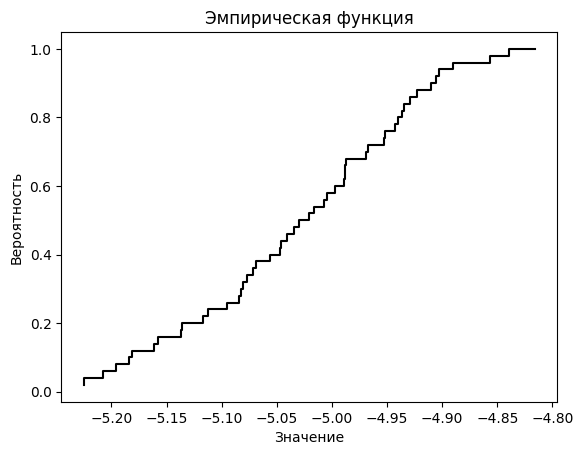

In [174]:
from statsmodels.distributions.empirical_distribution import ECDF

ecdf = ECDF(X)
plt.step(ecdf.x, ecdf.y, c='black')
plt.xlabel('Значение')
plt.ylabel('Вероятность')
plt.title('Эмпирическая функция')
plt.show()

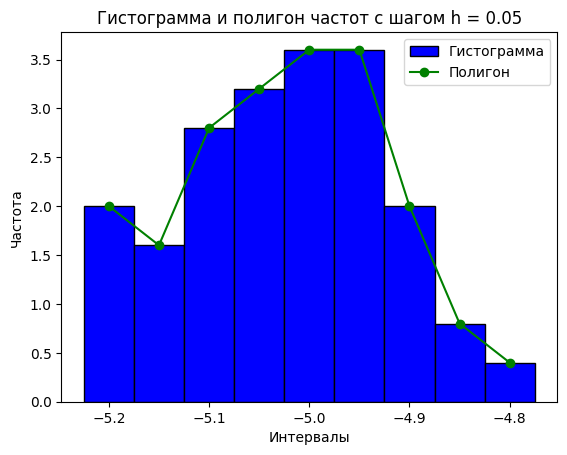

In [175]:
intervals = np.arange(X_var[0], X_var[-1] + h, h)
plt.hist(X_var, bins=intervals, density=True, color='blue', edgecolor='black', label='Гистограмма')
hist, _ = np.histogram(X_var, bins=intervals, density=True)
mid_points = 0.5 * (intervals[1:] + intervals[:-1])
plt.plot(mid_points, hist, color='green', marker='o', linestyle='-', label='Полигон')
plt.title(f'Гистограмма и полигон частот c шагом h = {h}')
plt.xlabel("Интервалы")
plt.ylabel("Частота")
plt.legend()
plt.show()

#### b) Вычислить выборочные аналоги следующих числовых характеристик: (i) математического ожидания; (ii) дисперсии; (iii) СКО; (iv) медианы; (v) ассиметрии; (vi) эксцесса; (vii) вероятности $\mathbb{P}(X \in [c, d]) $


In [176]:
X_stats = get_stats(X)
X_stats['probability'] = len([xi for xi in X if c <= xi <= d]) / len(X)

print("Математическое ожидание", X_stats['mean'])
print("Дисперсия", X_stats['var'])
print("СКО", X_stats['stddev'])
print("Медиана", X_stats['median'])
print("Ассиметрия", X_stats['skew'])
print("Эксцесс", X_stats['kurtosis'])
print(f"Вероятность попадания в [{c}, {d}]", X_stats['probability'])

Математическое ожидание -5.02388
Дисперсия 0.009879065599999997
СКО 0.0993934887203382
Медиана -5.0184999999999995
Ассиметрия -0.10731475465122328
Эксцесс -0.6783451901019579
Вероятность попадания в [-5.02, -4.96] 0.2


#### c) В предположении, что исходные наблюдения являются выборкой из нормального распределения, построить ОМП и ОММ параметров $(a, \sigma^2)$. Найти смещение оценок

Плотность нормального распределения:
$$
p_{\theta}(x)=\frac{1}{\sqrt{2\pi\sigma^2}} exp\left(-\frac{(x-a)^2}{2\sigma^2}\right)
$$

Найдем ОМП:
$$
L(X, \theta) = \sigma^{-n} \cdot (2\pi)^{-\frac{n}{2}} \cdot exp \left(-\frac{\sum_{i=1}^{n}(x_i-a)^2}{2\sigma^2}\right)
\\
L(X, \theta) = \sigma^{-n} \cdot (2\pi)^{-\frac{n}{2}} \cdot exp \left(-\frac{1}{{2\sigma^2}}\sum_{i=1}^{n}(x_i-a)^2\right)
\\
$LL(X;\theta)= - \frac{n}{2} \ln(2\pi) - n \ln(\sigma) - \frac{1}{{2\sigma^2}} \sum_{i=1}^{n}(x_i-a)^2
\\
\frac{\partial LL(X;\theta)}{\partial a} = \frac{1}{\sigma^2} \sum_{i=1}^{n}x_i -na = 0
\\
\Rightarrow \hat{a} = \frac{1}{n} \sum_{i=1}^{n}x_i = \bar{x}
\\
\frac{\partial LL(X;\theta)}{\partial \sigma} = -\frac{n}{\sigma} + \frac{1}{\sigma^{3}}\sum_{i=1}^{n}(x_i-a)^2 = 0
\\
\Rightarrow
\hat{\sigma^2} =\frac{1}{n}\sum_{i=1}^{n}(x_i-\bar{x})^2 = s^2
$$

Найдем ОММ:
$$
\mathbb{E}X_1=a;\, M_1=\bar{x}
\\
\mathbb{E}X_1^2=\sigma^2+a^2;\, M_{2}=\bar{x^2}
\\
\begin{cases}
    a = \bar{x} \\
    \sigma^2+a^2 = \bar{x^2}
\end{cases}
\\
\bar{x}^2 + \sigma^2 = \bar{x^2}
\\
\hat{\theta} = (\bar{x}, s^2)
$$

Найдем смещение
$$
\mathbb{E}\hat{a} = \frac{1}{n}\sum_{i=1}^{n}\mathbb{E}x_i = a
\\
\mathbb{E}\hat{\sigma^{2}}=\mathbb{E} s^2 = \frac{1}{n} \mathbb{E} \sum_{i=1}^{n}(x_i - \bar{x})^2 = \left[ x_i - \mathbb{E} x_i = y_i ; \mathbb{E} y_i = 0; \mathbb{D} y_i = \sigma^2 \right] = \frac{1}{n}\mathbb{E}\sum_{i=1}^{n}\left( y_i - \bar{y} \right)^2 = \mathbb{E}\bar{y^2} - \mathbb{E}\bar{y}^2
\\
\mathbb{E}\bar{y^2} = \frac{1}{n} \mathbb{E}\sum_{i=1}^{n}y_i^2 = \sigma^2
\\
\mathbb{E}\bar{y}^2 = \frac{1}{n^2} \mathbb{E}\left(\sum_{i=1}^{n}y_i^2 = \sigma^2\right)^2 = \frac{1}{n^2} \sum_{i=1}^{n}\sum_{j=1}^{n}\mathbb{E}y_i\cdot y_j
\\
i \neq j \Rightarrow \mathbb{E}y_i\cdot y_j = \mathbb{E}y_i \cdot \mathbb{E}y_j = 0
\\
i = j \Rightarrow \mathbb{E}y_i\cdot y_j = \mathbb{E}y_i^2 = \frac{\sigma^2}{n}
\\
\mathbb{E}\bar{y}^2 = \frac{\sigma^2}{n}
\\
\mathbb{E}\hat{\sigma^{2}} = \frac{n-1}{n} \sigma^2
$$
По первому параметру оценка несмещенная, а по второму смещение есть.

#### d) Построить доверительные интервалы уровня значимости $\alpha_2$ для параметров $(a, \sigma^2)$

Построим для первого параметра:
$$
\sqrt{n-1}\frac{\bar{x}-a}{s} \sim \mathcal{S}_{n-1}
$$
Выберем $x_{\alpha_2}$:
$$
\mathcal{S}_{n-1}\left(x{\alpha_2}\right) = 1 - \frac{\alpha_2}{2} = 1 - \frac{0.1}{2} = 0.95 
\\
\mathbb{P}\left( -x_{\alpha_2} \le \sqrt{n-1}\frac{\bar{x} - a}{s} \le x_{\alpha_2} \right) = 1 - \alpha_2
\\
\mathbb{P}\left( \bar{x} - \frac{x_{\alpha_2}s}{\sqrt{n-1}} \le a \le \bar{x} + \frac{x_{\alpha_2}s}{\sqrt{n-1}} \right) = 1 - \alpha_2
$$

In [177]:
x_alpha = stats.t.ppf(1 - alpha2 / 2, len(X) - 1)
c = x_alpha * X_stats['stddev'] / (len(X) - 1) ** 0.5
X_stats = get_stats(X)
print([X_stats['mean'] - c, X_stats['mean'] + c])

[-5.047685463166365, -5.000074536833635]


Построим для второго параметра:
$$
\frac{ns^2}{\sigma^2} \sim \chi_{n-1}^2
$$
Выберем $x_{1\alpha_2}$, $x_{2\alpha_2}$:
$$
K_{n-1}\left( x_{1\alpha_{2}} \right) = \frac{\alpha_{2}}{2}
\\
K_{n-1}\left( x_{2\alpha_{2}} \right) = 1 - \frac{\alpha_{2}}{2}
\\
\mathbb{P}\left( \frac{ns^2}{x_{1\alpha_{2}}} \le \sigma^2 \le \frac{ns^2}{x_{2\alpha_{2}}} \right) = 1 - \alpha_{2}
$$

In [178]:
x_1alpha = stats.chi.ppf(alpha2 / 2, len(X) - 1)
x_2alpha = stats.t.ppf(1 - alpha2 / 2, len(X) - 1)
X_stats = get_stats(X)
print([len(X) * X_stats['var'] / x_1alpha, len(X) * X_stats['var'] / x_2alpha])

[0.08479924545114599, 0.294624685944374]


#### e) С использованием теоремы Колмогорова построить критерий значимости простой гипотезы согласия с нормальным распределением с параметрами $(a_0, \sigma_0^2 )$ Проверить гипотезу на уровне значимости $\alpha_2$. Вычислить наибольшее значение уровня значимости, на котором еще нет оснований отвергнуть данную гипотезу.

Основная гипотеза: $H_0: (a_0, \sigma_0^2)$

По т. Колмогорова при справедливости $H_0$

$$ 
\sqrt{n} \max|F_n(y) - F(y)| \sim \mathcal{K}
\\
D_n = \sqrt{n} \max|F_n(y) - F(y)|
\\
\mathbb{P}(D_n < x_{\alpha_2}) = 1 - \alpha_2 = 0.9
$$


In [179]:
x_alpha2 = stats.ksone.ppf(1 - alpha2, len(X))
print("x_alpha2", x_alpha2)

def calc_Dn(X, cdf, *args):
    def Fn(x):
        s = 0
        for i in X:
            if i >= x:
                return s / len(X)
            s += 1
        return s / len(X)


    x = np.arange(X_var[0], X_var[-1], 0.001)
    y = [abs(Fn(i) - cdf(i, *args)) for i in x]
    
    return max(y)

Dn = calc_Dn(X, stats.norm.cdf, a0, sigma0)
print("Dn", Dn)

x_alpha2 0.14839812573875721
Dn 0.7024046752468542



$D_n > x_\alpha$, значит гипотеза $H_0$ отвергается. 

Найдём наибольшее значение уровня значимости, на котором нет оснований отвергнуть гипотезу.

In [180]:
alpha_max = 0
while alpha_max < 1:
    x_alpha_max = stats.ksone.ppf(1 - alpha_max, len(X))
    if Dn > x_alpha_max:
        break
    alpha_max += 1e-20
print("Наибольшее значение уровня значимости, на котором нет оснований отвергнуть гипотезу:", alpha_max)

Наибольшее значение уровня значимости, на котором нет оснований отвергнуть гипотезу: 5.551999999999704e-17


#### f) Используя гистограмму частот, построить критерий значимости $\chi^2$ проверки простой гипотезы согласия с нормальным распределением с параметрами $(α_0,\sigma_0^2)$. Проверить гипотезу на уровне значимости $\alpha_2$. Вычислить наибольшее значение уровня значимости, на котором еще нет оснований отвергнуть данную гипотезу.

In [181]:
def calc_criteria(X, a, sigma, cdf):
    intervals_count = 5
    hist, edges = np.histogram(X, bins=intervals_count)
    p = cdf(edges[1:], a, sigma) - cdf(edges[:-1], a, sigma)
    x2 = np.array([(hist[i] - len(X) * p[i]) ** 2 / (len(X) * p[i]) for i in range(len(hist))]).sum()
    print('x2', x2)
    return chi2.sf(x2, intervals_count - 1 - 2)


print('Макс уровень значимости', calc_criteria(X, a0, sigma0, scipy.stats.norm.cdf))

x2 5.42968458056615
Макс уровень значимости 0.06621539499485084


Получили, что максимальное значение уровня значимости превосходит $\alpha_2$, следовательно, гипотеза согласия с нормальным распределением с параметрами $(α_0,\sigma_0^2)$ отвергается.

#### g) Построить критерий проверки значимости $\chi^2$ сложной гипотезы согласия с нормальным распределением. Проверить гипотезу на уровне значимости $\alpha_2$. Вычислить наибольшее значение уровня значимости, на котором еще нет оснований отвергнуть данную гипотезу.

In [182]:
X_stats = get_stats(X)
print('Макс уровень значимости', calc_criteria(X, X_stats['mean'], X_stats['stddev'], scipy.stats.norm.cdf))

x2 1.554330486080588
Макс уровень значимости 0.4597073245180563


Получили, что максимальное значение уровня значимости не превосходит $\alpha_2$, следовательно, нет оснований отвергнуть гипотезу согласия с нормальным распределением.

#### h) Построить наиболее мощный критерий проверки простой гипотезы о нормальности с параметром $(a, σ^2) = (a_0, σ^2_0)$ при альтернативе нормальности с параметром $(a, σ^2) = (a_1, σ^2_1)$. Проверить гипотезу на уровне значимости $\alpha_2$. Что получится, если поменять местами основную и альтернативную гипотезы?

$$
a_0 = -5, \sigma_0 = 0.1 \\
a_1 = -5.11, \sigma_1 = 0.1, \; \alpha_2 = 0.1
$$
$ H_0 : X \sim \mathcal{N}\left(a_0, \sigma_0^2\right)$ - основная гипотеза
$ H_A : X \sim \mathcal{N}\left(a_1, \sigma_1^2\right)$ - альтернативная гипотеза

Согласно лемме Неймана-Пирсона наиболее мощный критерий проверки гипотезы $H_0$ при альтернативе $H_A$ имеет вид

$$
\phi(X) = \begin{cases}
  0, LR(X, a_0, \sigma_0^2, a_1 , \sigma_1^2) < C \\
  p, LR(X, a_0, \sigma_0^2, a_1 , \sigma_1^2) = C \\
  1, LR(X, a_0, \sigma_0^2, a_1 , \sigma_1^2) > C
\end{cases}
\\
\\
LR(X, a_0, \sigma_0^2, a_1 , \sigma_1^2 ) = \frac{L\left( X, a_1 , \sigma_1^2 \right)}{L\left( X,a_0, \sigma_0^2 \right)} = \frac{\sigma_1^{-n} \exp\left(-\sum_{i=1}^{n}\frac{(x_i - a_1)^2}{2\sigma_1^2}\right)}{\sigma_0^{-n} exp\left(-\sum_{i=1}^{n}\frac{(x_i - a_0)^2}{2\sigma_0^2}\right)} 
\\
\sigma_0^2 = \sigma_1^2 = \sigma^2
\\
T = \sum_{i=0}^{n}x_i  - МДС
\\
exp(\frac{5}{0.01} \sum_{i=0}^{n}x_i + \frac{n}{0.02} \cdot 0.121)) > C
\\
\frac{5}{0.01} \sum_{i=0}^{n}x_i + \frac{n}{0.02} \cdot 0.121 > ln(C)
\\
\sum_{i=0}^{n}x_i >  \cfrac{ln(C) + \frac{n}{0.02} \cdot 0.121}{\frac{5}{0.01} n}
C^* = \cfrac{ln(C) + \frac{n}{0.02} \cdot 0.121}{\frac{5}{0.01}}
$$
Критерий: 

$$
\phi(X) = \begin{cases}
  0, \sum_{i=0}^{n}x_i < C^* \\
  p, \sum_{i=0}^{n}x_i = C^* \\
  1, \sum_{i=0}^{n}x_i > C^*
\end{cases} 
\\
\\
\mathbb{E}_{(a_0, \sigma^2_0)} \varphi(X) = P_{a_0, \sigma_0^2}(\sum_{i=0}^{n}x_i > C^*) + p P_{a_0, \sigma_0^2}(\sum_{i=0}^{n}x_i = C^*) = \alpha_2
$$
Найдем $x_\alpha_2$: $1 - \Phi_{(na_0, n\sigma_0^2)}(x_\alpha_2) < \alpha_2 $

И $ p = \cfrac{\alpha_2 - 1 + \Phi_{na_0, n\sigma_0^2} (x_\alpha_2)}{\Phi_{na_0, n\sigma_0^2} (x_\alpha_2) - \Phi_{na_0, n\sigma_0^2} (x_\alpha_2 - 1)} $

In [183]:
x_alpha2 = -500
while True:
  if (1 - stats.norm.cdf(x_alpha2, len(X) * a0, len(X) * sigma0)) < alpha2:
    break
  x_alpha2 += 0.01

print('x_alpha2', x_alpha2)
Phi_x_alpha2 = stats.norm.cdf(x_alpha2, a0 * len(X), sigma0 * len(X))
Phi_x_alpha21 = stats.norm.cdf(x_alpha2 - 1, a0 * len(X), sigma0 * len(X))

p = (alpha2 - 1 + Phi_x_alpha2) / (Phi_x_alpha2 - Phi_x_alpha21)
print('p', p)
print('Сумма выборки', X.sum())

x_alpha2 -243.5900000002332
p 0.0019815387387184026
Сумма выборки -251.194


Получили наиболее мощный критерий:
$$
\phi(X) = \begin{cases}
  0, -251.194 < -243.59 \\
  0.00198, -251.194 = -243.59 \\
  1, -251.194 > -243.59
\end{cases} 
$$
Так как $-251.194 < -243.59$, гипотеза $H_0$ принимается.

Поменяем местами основную и альтернативную гипотезы:

$ H_0 : X \sim \mathcal{N}\left(a_1, \sigma_1^2\right)$ - основная гипотеза
$ H_A : X \sim \mathcal{N}\left(a_0, \sigma_0^2\right)$ - альтернативная гипотеза

Согласно лемме Неймана-Пирсона наиболее мощный критерий проверки гипотезы $H_0$ при альтернативе $H_A$ имеет вид

$$
\phi(X) = \begin{cases}
  0, LR(X, a_0, \sigma_0^2, a_1 , \sigma_1^2) < C \\
  p, LR(X, a_0, \sigma_0^2, a_1 , \sigma_1^2) = C \\
  1, LR(X, a_0, \sigma_0^2, a_1 , \sigma_1^2) > C
\end{cases}
\\
\\
LR(X, a_0, \sigma_0^2, a_1 , \sigma_1^2 ) = \frac{L\left( X, a_0 , \sigma_0^2 \right)}{L\left( X,a_1, \sigma_1^2 \right)} = \frac{\sigma_0^{-n} \exp\left(-\sum_{i=1}^{n}\frac{(x_i - a_0)^2}{2\sigma_0^2}\right)}{\sigma_1^{-n} exp\left(-\sum_{i=1}^{n}\frac{(x_i - a_1)^2}{2\sigma_1^2}\right)} 
\\
\sigma_1^2 = \sigma_0^2 = \sigma^2
\\
T = \sum_{i=0}^{n}x_i  - МДС
\\
exp(-\frac{5}{0.01} \sum_{i=0}^{n}x_i - \frac{n}{0.02} \cdot 0.121)) > C
\\
-\frac{5}{0.01} \sum_{i=0}^{n}x_i - \frac{n}{0.02} \cdot 0.121 > ln(C)
\\
\sum_{i=0}^{n}x_i < -\cfrac{ln(C) + \frac{n}{0.02} \cdot 0.121}{\frac{5}{0.01} n}
C^* = -\cfrac{ln(C) + \frac{n}{0.02} \cdot 0.121}{\frac{5}{0.01}}
$$
Критерий: 

$$
\phi(X) = \begin{cases}
  0, \sum_{i=0}^{n}x_i > C^* \\
  p, \sum_{i=0}^{n}x_i = C^* \\
  1, \sum_{i=0}^{n}x_i < C^*
\end{cases} 
\\
\\
\mathbb{E}_{(a_1, \sigma_1^2)} \varphi(X) = P_{a_1, \sigma_1^2}(\sum_{i=0}^{n}x_i > C^*) + p P_{a_1, \sigma_1^2}(\sum_{i=0}^{n}x_i = C^*) = \alpha_2
$$
Найдем $x_\alpha_2$: $1 - \Phi_{(na_1, n\sigma_1^2)}(x_\alpha_2) < \alpha_2 $

И $ p = \cfrac{\alpha_2 - 1 + \Phi_{na_1, n\sigma_1^2} (x_\alpha_2)}{\Phi_{na_1, n\sigma_1^2} (x_\alpha_2) - \Phi_{na_1, n\sigma_1^2} (x_\alpha_2 - 1)} $

In [184]:
x_alpha2 = -500
while True:
  if (1 - stats.norm.cdf(x_alpha2, len(X) * a1, len(X) * sigma1)) < alpha2:
    break
  x_alpha2 += 0.01

print('x_alpha2', x_alpha2)
Phi_x_alpha2 = stats.norm.cdf(x_alpha2, a1 * len(X), sigma1 * len(X))
Phi_x_alpha21 = stats.norm.cdf(x_alpha2 - 1, a1 * len(X), sigma1 * len(X))

p = (alpha2 - 1 + Phi_x_alpha2) / (Phi_x_alpha2 - Phi_x_alpha21)
print('p', p)
print('Сумма выборки', X.sum())

x_alpha2 -249.0900000002282
p 0.0019815387431666837
Сумма выборки -251.194


Получили наиболее мощный критерий:
$$
\phi(X) = \begin{cases}
  0, -251.194 > -249.09 \\
  0.00198, -251.194 = -249.09 \\
  1, -251.194 < -249.09
\end{cases} 
$$
$-251.194 < -249.09$, следовательно, гипотеза $H_0$ после замены основной и альтернативной гипотез отвергается

#### i.c) В предположении, что исходные наблюдения являются выборкой из распределения Лапласа, построить оценку максимального правдоподобия параметров $(a, \sigma^2)$ и соответствующие оценки по методу моментов. Найти смещение оценок.

Плотность распределения Лапласа:
$$
p_{a,\sigma}(x)=\frac{1}{\sigma \sqrt{2}} \exp\left( -\frac{\sqrt{2}}{\sigma} |x - a| \right)
$$
Найдем ОМП:
$$
\\
L(X, \theta) = \frac{1}{\left(2\sigma^2\right)^\frac{n}{2}} \exp\left( -\frac{\sqrt{2}}{\sigma} \sum_{i=1}^{n}|x_i - a| \right)
\\
LL(X, \theta)= -\frac{n}{2}\ln(2) - n\ln(\sigma) - \frac{\sqrt{2}}{\sigma} \sum_{i=1}^{n}|x_i - a|
\\
\frac{\partial LL(X, \hat{a}, \sigma)}{\partial \sigma} = -\frac{n}{\sigma} + \frac{\sqrt{2}}{\sigma ^ 2} \sum_{i=1}^{n}|x_i - \hat{a}| = 0 
\\
\hat{\sigma} = \frac{\sqrt{2}}{n} \sum_{i=1}^{n}|x_{i} - \hat{a}|
\\
\frac{\partial LL(X, a, \hat{\sigma})}{\partial a} = -\frac{\sqrt{2}}{\sigma} \sum_{i=1}^{n} \mathop{\mathrm{sgn}}(x_{i} - a) = 0 
\\ 
\sum_{i=1}^{n} \mathop{\mathrm{sgn}}(x_{i} - a) = 0 
\\
\hat{a} = z_{n, \frac{1}{2}}
$$

In [185]:
a_omp = np.median(X)
sigma_omp = np.sqrt(2)/len(X) * np.sum([np.abs(xi - a_omp) for xi in X])
print(a_omp, sigma_omp)

-5.0184999999999995 0.11613521774207856


Найдем ОММ:
Первый момент:
$$
\mathbb{E}X_1 = \frac{1}{\sigma \sqrt{2}} \int_{\mathbb{R}} x \exp\left(-\frac{\sqrt{2}}{\sigma} |x-a|\right) dx = [t = x - a] = \\
= \frac{1}{\sigma \sqrt{2}} \int_{\mathbb{R}} (t + a) \exp\left(-\frac{\sqrt{2}}{\sigma} |t|\right) dx = \\
= \frac{a}{\sigma} \sqrt{2} \int_{0}^{\infty} \exp\left(-\frac{\sqrt{2}}{\sigma} t\right) dx = a
\\
M1 = \bar{x}
$$
Второй момент:
$$
\mathbb{E}X_1^2 = \frac{1}{\sigma \sqrt{2}} \int_{\mathbb{R}} x^2 \exp\left(-\frac{\sqrt{2}}{\sigma} |x-a|\right) dx = [t = x - a] = \\
= \frac{1}{\sigma \sqrt{2}} \int_{\mathbb{R}} (t + a)^2 \exp\left(-\frac{\sqrt{2}}{\sigma} |t|\right) dx = \\
= \frac{1}{\sigma \sqrt{2}} \int_{\mathbb{R}} t^2 \exp\left(-\frac{\sqrt{2}}{\sigma} |t|\right) dx + \frac{1}{\sigma \sqrt{2}} \int_{\mathbb{R}} a^2 \exp\left(-\frac{\sqrt{2}}{\sigma} |t|\right) dx  = \\
= \frac{ \sqrt{2}}{\sigma} \int_{0}^{\infty} t^2 \exp\left(-\frac{\sqrt{2}}{\sigma} t\right) dx + \frac{\sqrt{2}}{\sigma } \int_{0}^{\infty} a^2 \exp\left(-\frac{\sqrt{2}}{\sigma} t\right) dx = \sigma^2 + a^2
\\
M1 = \bar{x^2}
$$
Тогда:
$$
\begin{cases}
  a = \bar{x} \\
  \sigma^2 + a^2 = \bar{x^2}
\end{cases}
\\
\begin{cases}
  \hat{a} = \bar{x} \\
  \hat{\sigma^2} = s^2
\end{cases}
$$
Найдем смещение оценок:
$$
E_\theta \bar{x} = \cfrac{1}{n} E \sum_{i=1}^{n} X_i = a
$$

#### i.d) Построить доверительные интервалы уровня значимости $\alpha_2$ для параметров $(a, \sigma^2)$

Построим для первого параметра:
$$
\sqrt{n-1}\frac{\bar{x}-a}{s} \sim \mathcal{S}_{n-1}
$$
Выберем $x_{\alpha_2}$:
$$
\mathcal{S}_{n-1}\left(x{\alpha_2}\right) = 1 - \frac{\alpha_2}{2} = 1 - \frac{0.1}{2} = 0.95 
\\
\mathbb{P}\left( -x_{\alpha_2} \le \sqrt{n-1}\frac{\bar{x} - a}{s} \le x_{\alpha_2} \right) = 1 - \alpha_2
\\
\mathbb{P}\left( \bar{x} - \frac{x_{\alpha_2}s}{\sqrt{n-1}} \le a \le \bar{x} + \frac{x_{\alpha_2}s}{\sqrt{n-1}} \right) = 1 - \alpha_2
$$

In [186]:
x_alpha = stats.t.ppf(1 - alpha2 / 2, len(X) - 1)
c = x_alpha * X_stats['stddev'] / (len(X) - 1) ** 0.5
X_stats = get_stats(X)
print([X_stats['mean'] - c, X_stats['mean'] + c])

[-5.047685463166365, -5.000074536833635]


Построим для второго параметра:
$$
\frac{ns^2}{\sigma^2} \sim \chi_{n-1}^2
$$
Выберем $x_{1\alpha_2}$, $x_{2\alpha_2}$:
$$
K_{n-1}\left( x_{1\alpha_{2}} \right) = \frac{\alpha_{2}}{2}
\\
K_{n-1}\left( x_{2\alpha_{2}} \right) = 1 - \frac{\alpha_{2}}{2}
\\
\mathbb{P}\left( \frac{ns^2}{x_{1\alpha_{2}}} \le \sigma^2 \le \frac{ns^2}{x_{2\alpha_{2}}} \right) = 1 - \alpha_{2}
$$

In [187]:
x_1alpha = stats.chi.ppf(alpha2 / 2, len(X) - 1)
x_2alpha = stats.t.ppf(1 - alpha2 / 2, len(X) - 1)
X_stats = get_stats(X)
print([len(X) * X_stats['var'] / x_1alpha, len(X) * X_stats['var'] / x_2alpha])

[0.08479924545114599, 0.294624685944374]


#### i.e) С использованием теоремы Колмогорова построить критерий значимости простой гипотезы согласия с распределением Лапласа с параметрами $(a_0, \sigma_0^2 )$ Проверить гипотезу на уровне значимости $\alpha_2$. Вычислить наибольшее значение уровня значимости, на котором еще нет оснований отвергнуть данную гипотезу.

Основная гипотеза: $H_0: (a_0, \sigma_0^2)$

По т. Колмогорова при справедливости $H_0$

$$ 
\sqrt{n} \max|F_n(y) - F(y)| \sim \mathcal{K}
\\
D_n = \sqrt{n} \max|F_n(y) - F(y)|
\\
\mathbb{P}(D_n < x_{\alpha_2}) = 1 - \alpha_2 = 0.9
$$

In [188]:
x_alpha2 = stats.ksone.ppf(1 - alpha2, len(X))
print("x_alpha2", x_alpha2)

Dn = calc_Dn(X, stats.laplace.cdf, a0, sigma0)
print("Dn", Dn)

x_alpha2 0.14839812573875721
Dn 0.7028363576330103



$D_n > x_\alpha$, значит гипотеза $H_0$ отвергается. 

Найдём наибольшее значение уровня значимости, на котором нет оснований отвергнуть гипотезу.

In [189]:
alpha_max = 0
while alpha_max < 1:
    x_alpha_max = stats.ksone.ppf(1 - alpha_max, len(X))
    if Dn > x_alpha_max:
        break
    alpha_max += 1e-20
print("Наибольшее значение уровня значимости, на котором нет оснований отвергнуть гипотезу:", alpha_max)

Наибольшее значение уровня значимости, на котором нет оснований отвергнуть гипотезу: 5.551999999999704e-17


#### i.f) Используя гистограмму частот, построить критерий значимости $\chi^2$ проверки простой гипотезы согласия с распределением Лапласа с параметрами $(a_0,\sigma_0^2)$. Проверить гипотезу на уровне значимости $\alpha_2$. Вычислить наибольшее значение уровня значимости, на котором еще нет оснований отвергнуть данную гипотезу.

In [190]:
print('Макс уровень значимости', calc_criteria(X, a0, sigma0, scipy.stats.laplace.cdf))

x2 6.10194140749406
Макс уровень значимости 0.047312975210907895


Получили, что максимальное значение уровня значимости превосходит $\alpha_2$, следовательно, гипотеза согласия с распределением Лапласа с параметрами $(α_0,\sigma_0^2)$ отвергается.

#### i.g) Построить критерий проверки значимости $\chi^2$ сложной гипотезы согласия с распределением Лапласа. Проверить гипотезу на уровне значимости $\alpha_2$. Вычислить наибольшее значение ровня значимости, на котором еще нет оснований отвергнуть данную гипотезу.

In [191]:
print('Макс уровень значимости', calc_criteria(X, np.mean(X), np.std(X), scipy.stats.laplace.cdf))

x2 4.030838735277071
Макс уровень значимости 0.13326450482505997


Получили, что максимальное значение уровня значимости не превосходит $\alpha_2$, следовательно, нет оснований отвергнуть гипотезу согласия с нормальным распределением.

## Выводы

В ходе лабораторной работы были получены навыки практического применения методов математической статистики для визуализации и анализа полученных данных; сформированы навыки реализации методов с помощью прикладных программных пакетов. Приобретены навыки анализа статистических данных при помощи языка программирования Python и его. В ходе работы были построены оценки, доверительные интервалы и проверены различные гипотезы.